<a href="https://colab.research.google.com/github/piam5662/laravel-lumen-100k-data_entry-in-4sec/blob/master/data_project_code_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract—** The Olist Store is an online platform where people can post or look for buying  phones, fashionable items such as clothes and shoes or electronic devices. This paper presents an overview of The datasets of the olist store are used to measure many things including  needs of customers, predicting trends and  customer’s behavior depending on many factors. 

In [ ]:
#libraries
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
order = pd.read_csv("/content/drive/MyDrive/Sem 6/Big Data/Project/olist_order_items_dataset.csv")
product=pd.read_csv("/content/drive/MyDrive/Sem 6/Big Data/Project/olist_products_dataset.csv")

In [ ]:
order.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

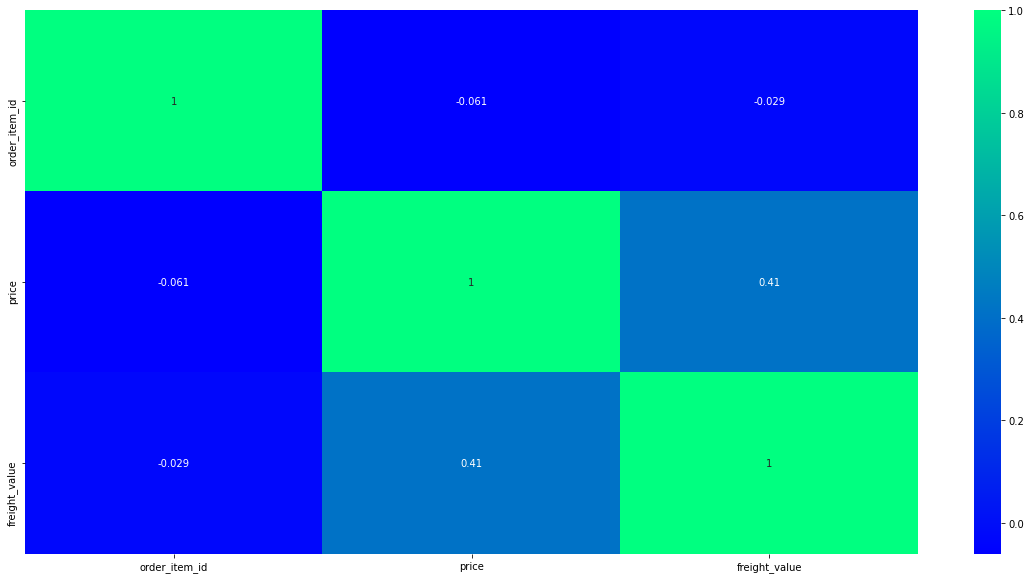

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(order.corr(), annot = True, cmap='winter')

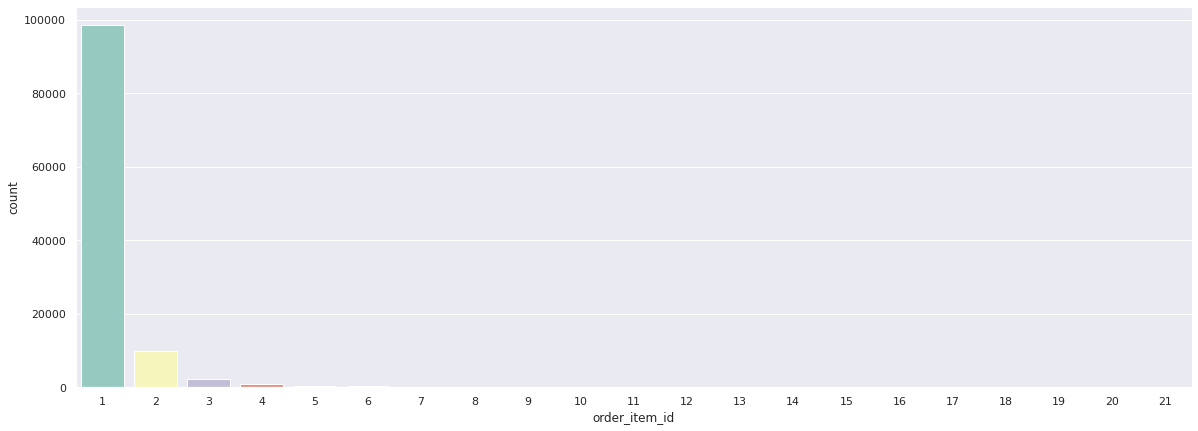

In [ ]:
plt.figure(figsize = (20,7))
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="order_item_id", data=order, palette="Set3", dodge=False)

In [ ]:
order['month'] = pd.DatetimeIndex(order['shipping_limit_date']).month

In [ ]:
order.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,5
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2


#Q1 )Exploratory  analysis : Is there any significant trend in sales based on any particular season, months or days?

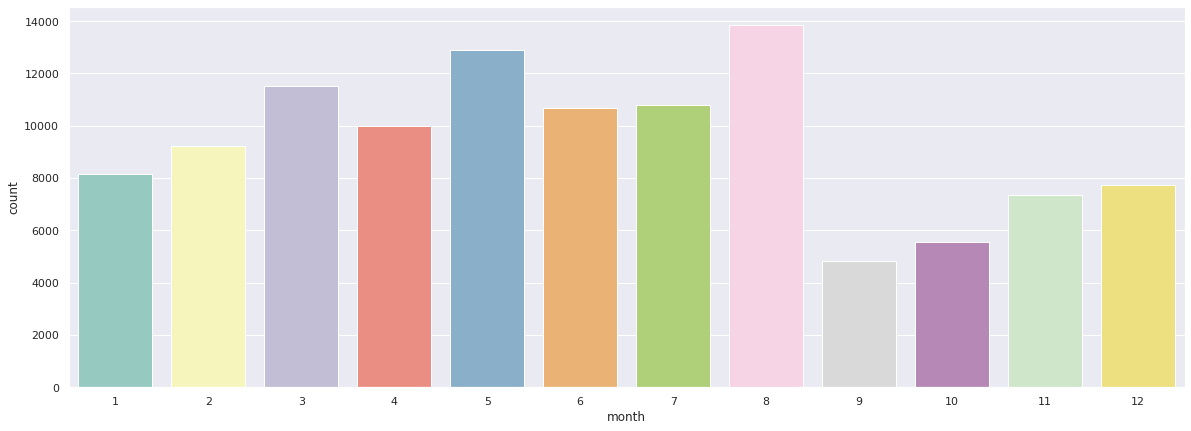

In [ ]:
plt.figure(figsize = (20,7))
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="month", data=order, palette="Set3", dodge=False)

In [ ]:
order['day'] = pd.DatetimeIndex(order['shipping_limit_date']).day

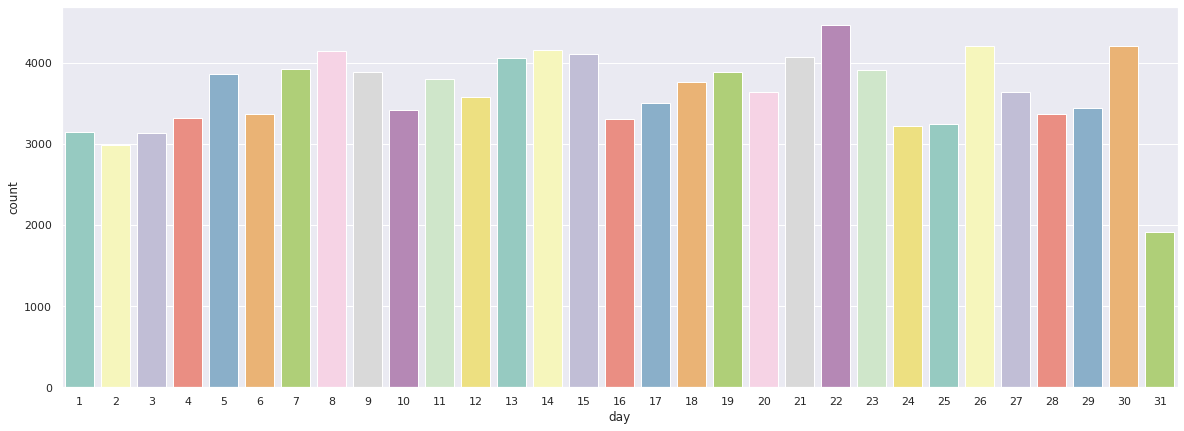

In [ ]:
plt.figure(figsize = (20,7))
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="day", data=order, palette="Set3", dodge=False)

In [ ]:
product


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
# plt.figure(figsize = (20,7))
# sns.set_theme(style="darkgrid")

# ax = sns.countplot(x="product_category_name", data=product, palette="Set3", dodge=False)

In [ ]:
product.index = product['product_id']

In [ ]:
q1= order.join(product, on = ['product_id'], rsuffix ='_w')

In [ ]:
q5=q1
q1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,month,day,product_id_w,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,9,19,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,5,3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,18,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,8,15,7634da152a4610f1595efa32f14722fc,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2,13,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,5,2,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,7,20,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,10,30,72a30483855e2eafc67aee5dc2560482,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,8,21,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [ ]:
# plt.figure(figsize = (20,30))
# ax = sns.barplot(x="month", y="product_category_name", data=q1)

# Q2)  Exploratory  analysis : Which product category mostly sells on which months?

In [ ]:
# #month1=q1.loc[q1['month'].isin("1")]
# month1=q1.loc[q1['month'] == 1]
# month1.head()

In [ ]:
#function to return visual representation of top product by month 
def top_product_by_month(month,name):
  month1=q1.loc[q1['month'] == month]
  plt.figure(figsize = (20,7))
  sns.set_theme(style="darkgrid")
  top_colors = month1.product_category_name.value_counts()
  top_colors[:10].plot(kind='barh')
  plt.xlabel('No. of Products for '+name+' month');

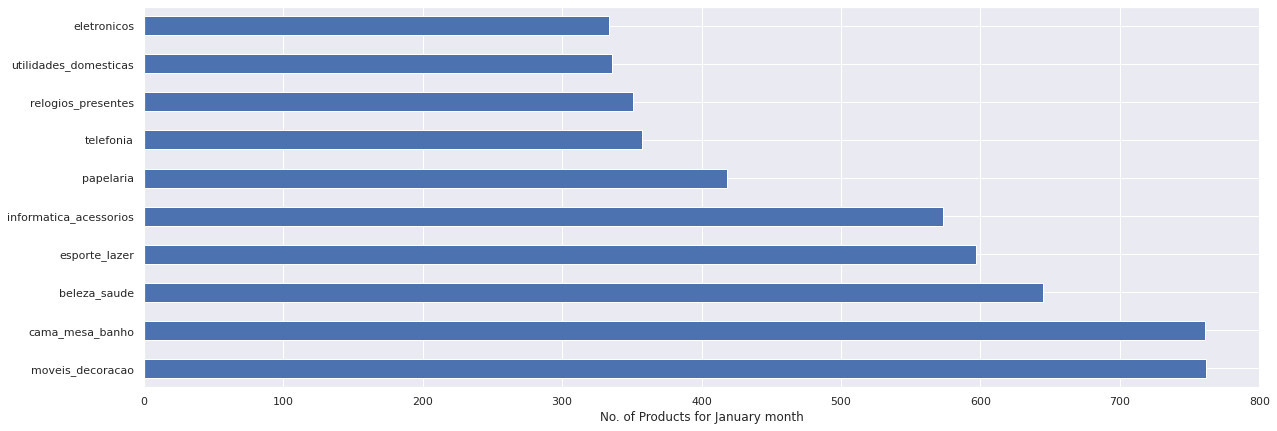

In [ ]:
top_product_by_month(1,	"January")

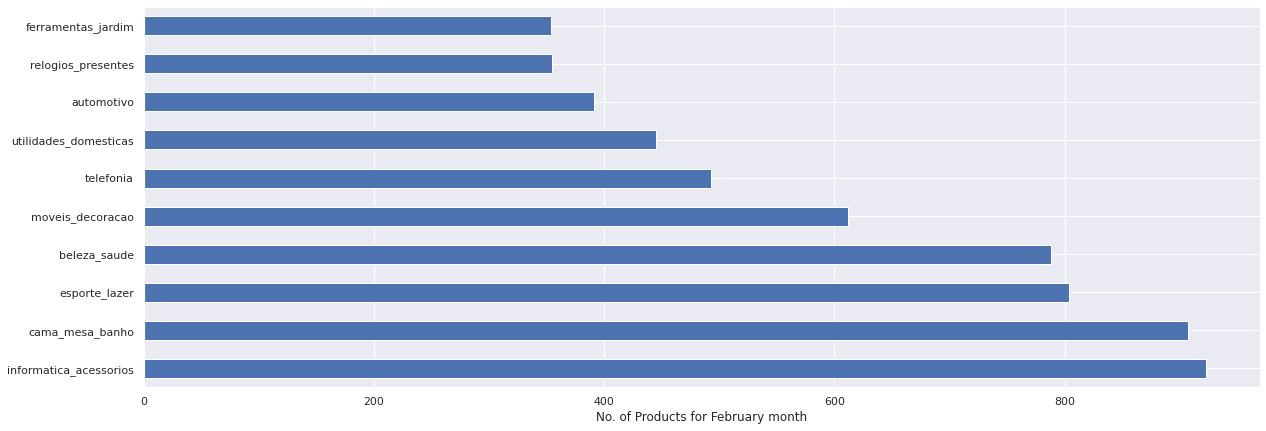

In [ ]:
top_product_by_month(2,"February")

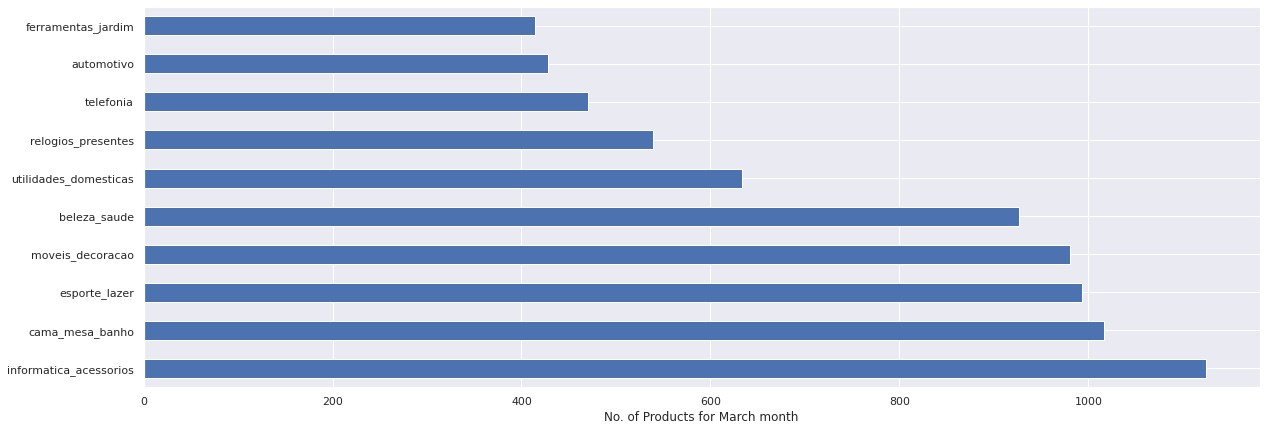

In [ ]:
top_product_by_month(3,"March")

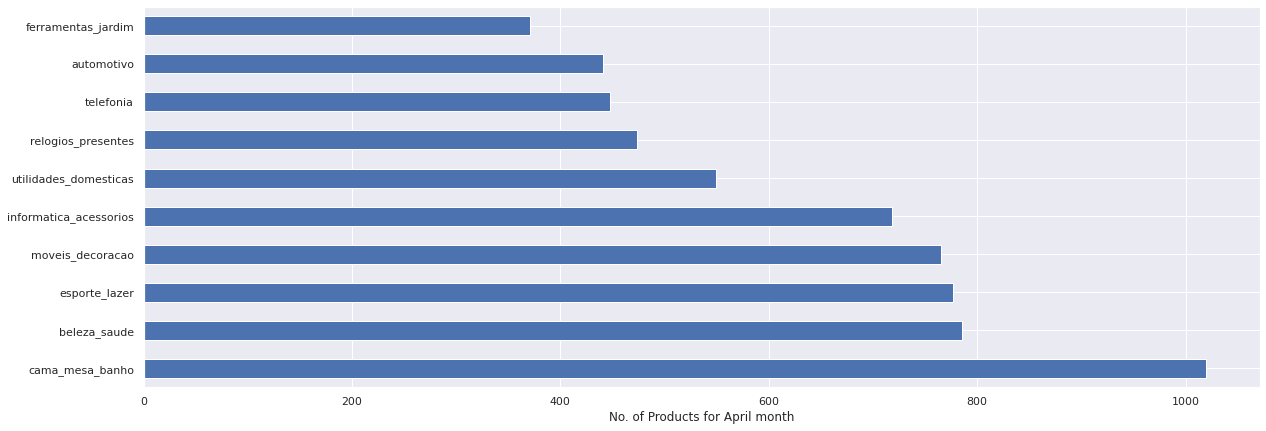

In [ ]:
top_product_by_month(4,"April")

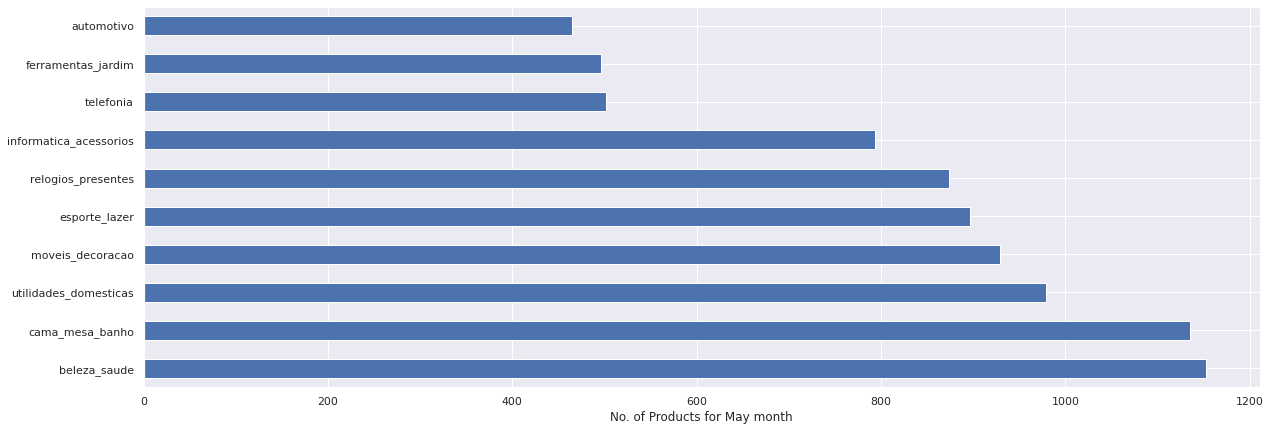

In [ ]:
top_product_by_month(5,'May')

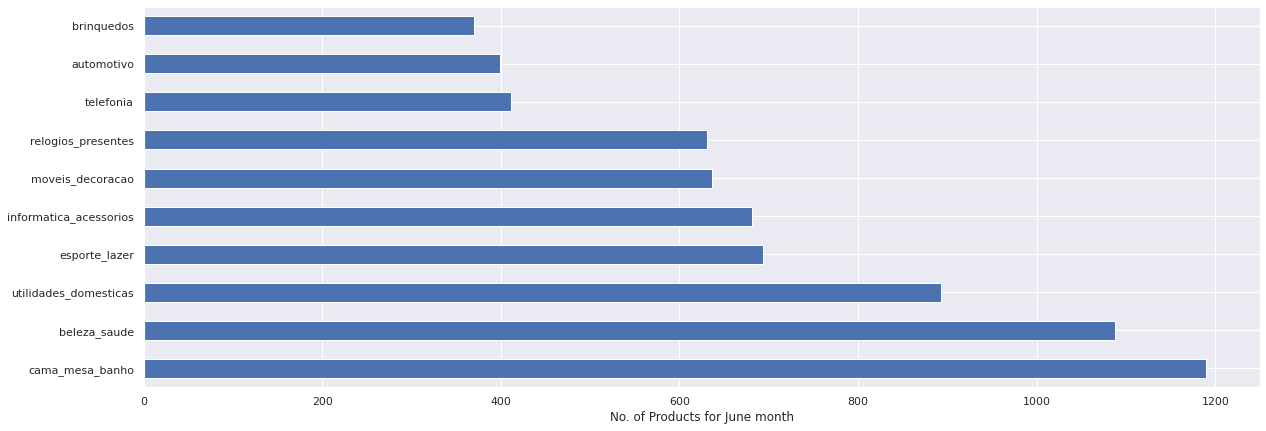

In [ ]:
top_product_by_month(6,'June')

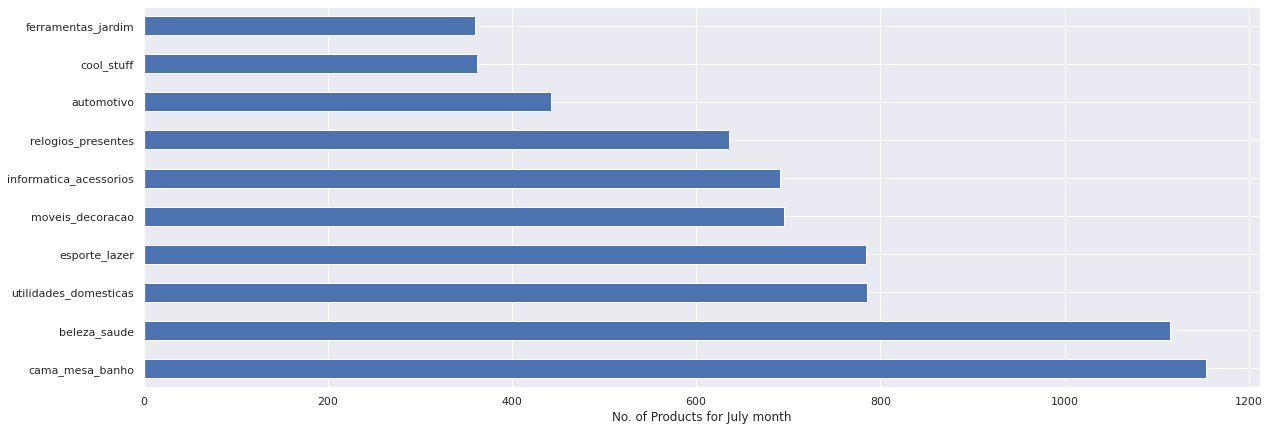

In [ ]:
top_product_by_month(7,'July')

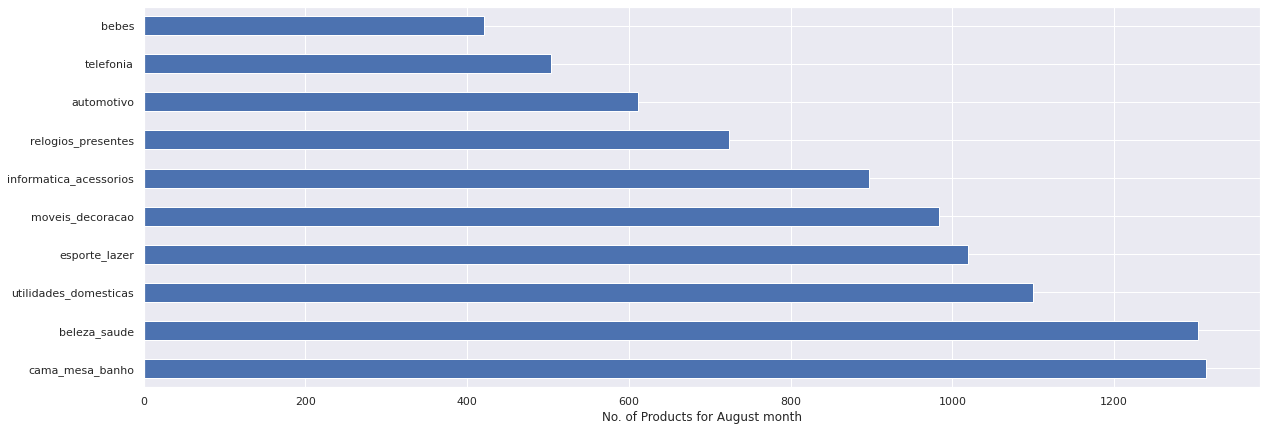

In [ ]:
top_product_by_month(8,'August')

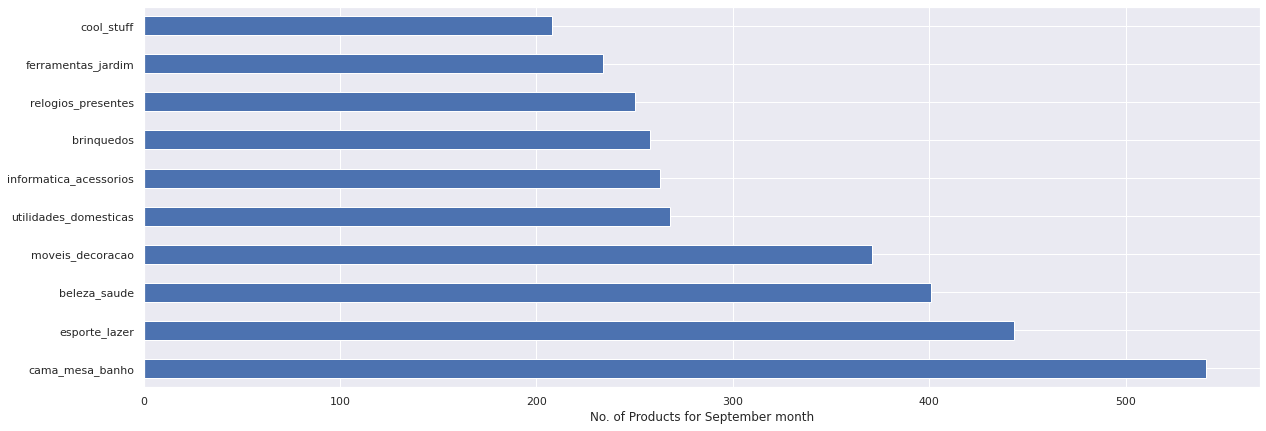

In [ ]:
top_product_by_month(9,'September')

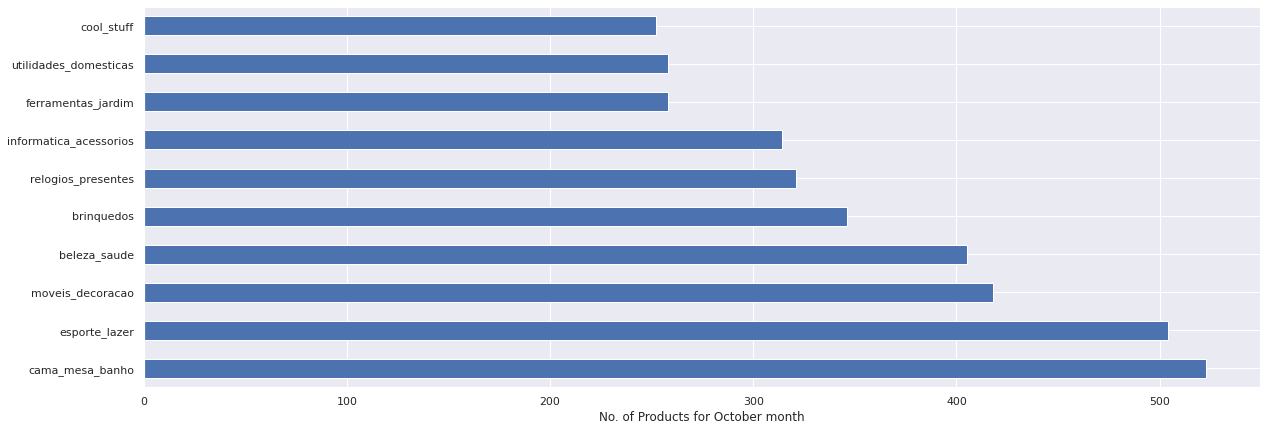

In [ ]:
top_product_by_month(10,'October')

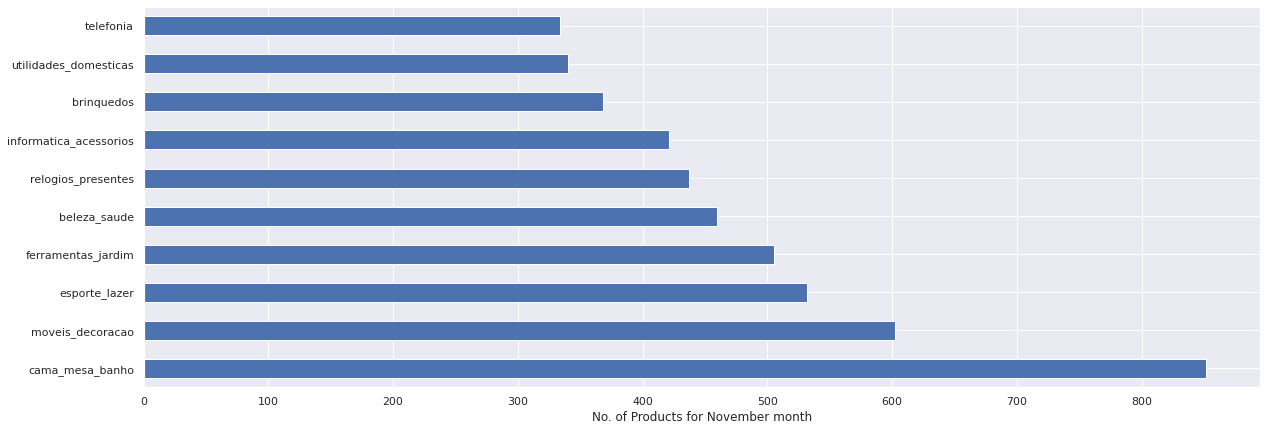

In [ ]:
top_product_by_month(11,'November')

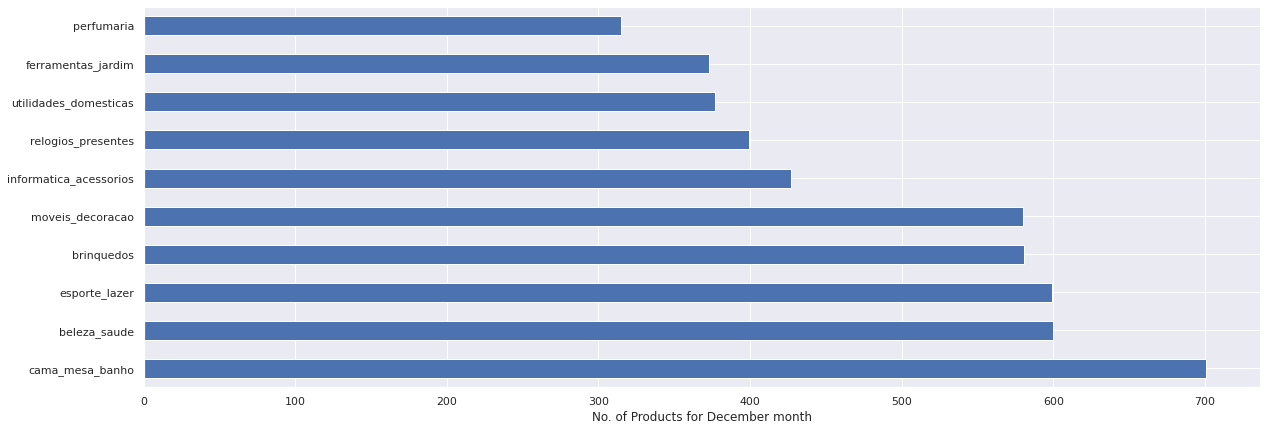

In [ ]:
top_product_by_month(12,'December')

# Q3) How efficient is the delivery service, is there any way to improve it?

In [ ]:
order_det = pd.read_csv('/content/drive/MyDrive/Sem 6/Big Data/Project/olist_orders_dataset.csv')
order_det

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
order_det = pd.merge(order_det,review_df,on='order_id')

In [ ]:
order_det

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,e07549ef5311abcc92ba1784b093fb56,2,fiquei triste por n ter me atendido.,2017-05-13 00:00:00,2017-05-13 20:25:42
4,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,15898b543726a832d4137fbef5d1d00e,1,Aguardando retorno da loja,2017-05-30 00:00:00,2017-05-30 23:13:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41748,b0f4af5c1b06e24fef510703bfe9f0a6,8e1ec396e317ff4c82a03ce16a0c3eb3,delivered,2017-10-27 15:21:00,2017-10-27 15:32:49,2017-10-30 15:44:34,2017-11-10 17:57:22,2017-11-22 00:00:00,ede62474f1618961be12678f362dca4a,5,Otimo comprar por este site as mercadorias che...,2017-11-11 00:00:00,2017-11-15 09:54:14
41749,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,8ea780895f362ce949029f95b7181ff0,1,"Ele não é um mini cajon, é um shaker, ou seja,...",2018-01-19 00:00:00,2018-01-21 02:51:39
41750,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
41751,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57


In [ ]:
order_det['order_purchase_timestamp'] = pd.to_datetime(order_det['order_purchase_timestamp'])
order_det['order_delivered_customer_date'] = pd.to_datetime(order_det['order_delivered_customer_date'])

In [ ]:
order_det['time_delivered'] = order_det['order_delivered_customer_date'] - order_det['order_purchase_timestamp']

In [ ]:
order_det['time_delivered'] = order_det['time_delivered'] / np.timedelta64(1,'D')

In [ ]:
order_det['time_delivered'] = order_det.time_delivered.astype(int,errors='ignore')

In [ ]:
order_det.sort_values(by='review_score',ascending=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,time_delivered
15469,3927d50ce663f7648ed0ca807740c6fe,da79d4dc6d443cfd01804d03420c90de,delivered,2018-05-07 13:31:20,2018-05-07 15:32:35,2018-05-10 08:02:00,2018-05-14 19:51:34,2018-06-04 00:00:00,7f3bdb463adfdd5dd7f370de27fb3a8b,5,Ótima qualidade e chegou antes do previsto.,2018-05-15 00:00:00,2018-05-16 11:20:32,7.264051
14605,141f7d3071b3a6ebbc34ea1454624e3f,8fad1c45f7d9d8210fa58f3b754c0932,delivered,2018-05-17 21:26:53,2018-05-18 02:54:28,2018-05-18 13:34:00,2018-05-24 14:38:43,2018-06-04 00:00:00,df3cefbcb8087fe886769dd4d18d54ca,5,Ótimo custo x benefício.,2018-05-25 00:00:00,2018-05-27 17:57:38,6.716551
36798,660c1d7b1c79eac538006732c1246f32,e3ad13593ae3a76a29112cc827f33675,delivered,2018-08-13 20:46:51,2018-08-13 21:04:15,2018-08-15 05:41:00,2018-08-21 22:43:34,2018-08-31 00:00:00,d0e7bdcf09b5c1625ff23ea4ad0b6c5b,5,Muito bom. Foi exatamente o que pedi.,2018-08-22 00:00:00,2018-08-25 02:58:12,8.081053
25283,d31eb970bb1acce19ffa95359ac4de15,18796ca7e8c4ac5d37266b3015a4de85,delivered,2018-07-02 09:10:01,2018-07-02 09:30:31,2018-07-03 12:41:00,2018-07-06 18:44:35,2018-07-23 00:00:00,569bfb823a14e706840a2f268bfc2770,5,Excelente! Entregou antes do prazo,2018-07-07 00:00:00,2018-07-07 22:55:40,4.399005
14601,1d5971c6ac68e27ee67fcb4ef122897f,8a795f8302a07067181e2b08c8e9280c,delivered,2018-01-04 01:55:07,2018-01-04 04:55:32,2018-01-04 21:52:10,2018-01-21 12:03:40,2018-02-07 00:00:00,a4891adb29b5a45451bc67a4f1d39c85,5,Chegou em perfeitas condições,2018-01-22 00:00:00,2018-01-23 17:49:01,17.422604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,cd3f1c4c9d4aaf1ea8940fbb22adced5,3921e420e5646a7e636ac3c2b6334136,shipped,2017-05-19 11:30:48,2017-05-19 11:42:56,2017-05-19 12:59:26,NaT,2017-06-14 00:00:00,c46a279541e8ce5d1bed5bc4079402cb,1,Nao tenho o q dizer agora,2017-06-07 00:00:00,2017-06-09 17:32:00,NaN
34887,b3f78acb69b2fca2335a0da9c6615c6b,44d638882c3d415ba896c5d665d1bcc7,shipped,2017-04-28 11:21:09,2017-04-28 12:00:42,2017-05-16 16:51:52,NaT,2017-05-22 00:00:00,fc68f150ba899eceb6714f05b57cf752,1,ruim,2017-05-24 00:00:00,2017-06-07 14:26:00,NaN
19914,29f5dd847b7db645b7ce75cc49ddb612,1d91cf6cc20b01f12621a12c0980c84c,delivered,2018-05-02 20:29:20,2018-05-02 20:53:52,2018-05-03 15:21:00,2018-05-07 19:36:52,2018-05-10 00:00:00,86f806759420954a5b92998f738ff93b,1,Não entregaram o produto certo e não querem en...,2018-05-08 00:00:00,2018-05-10 14:50:57,4.963565
19913,0e09e160c7532013444616096bc75f89,c90789e9dd14b036d46efe4a4b830f75,invoiced,2018-04-18 17:12:24,2018-04-18 17:58:16,NaN,NaT,2018-05-04 00:00:00,8f1d7d83c2c9bf092329a76de348706e,1,Fui enganado por esse fornecedor. Não postou o...,2018-05-06 00:00:00,2018-05-06 04:14:10,NaN


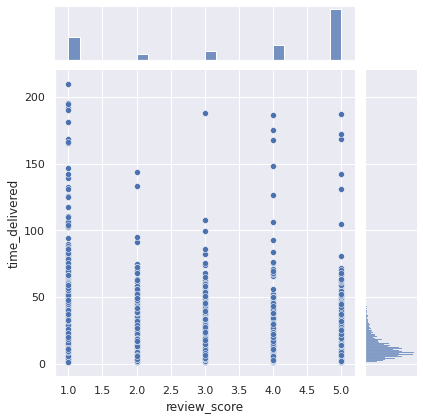

In [ ]:
sns.jointplot(x='review_score', y='time_delivered', data=order_det);

From this plot, we can see that there are more 1-star reviews than 5-stars while considering delivery time. So the longer it takes to deliver the lower the review scores would be.

#Q4.	Descriptive  analysis: What is the most popular payment method among     customers?

In [ ]:
payment=pd.read_csv("/content/drive/MyDrive/Sem 6/Big Data/Project/olist_order_payments_dataset.csv")

In [ ]:
payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


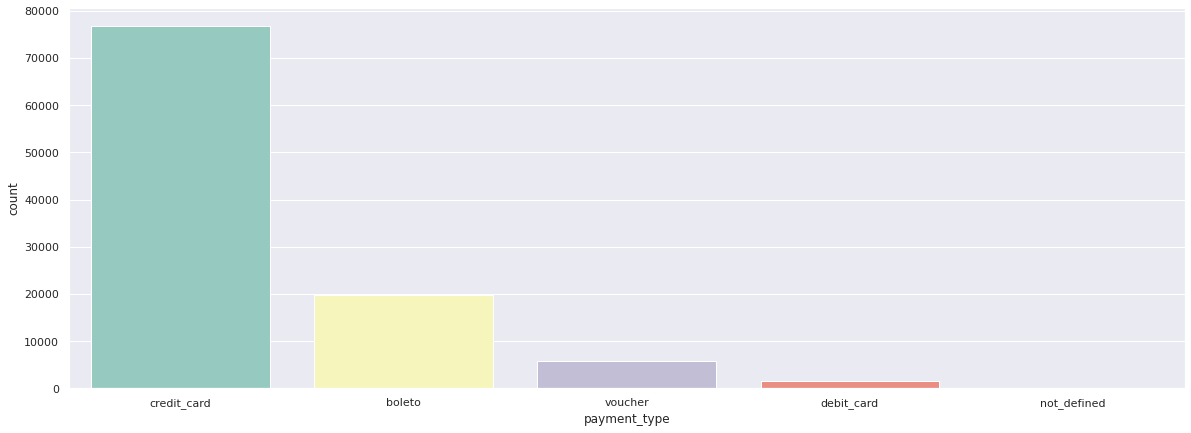

In [ ]:
plt.figure(figsize = (20,7))
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="payment_type", data=payment, palette="Set3", dodge=False)

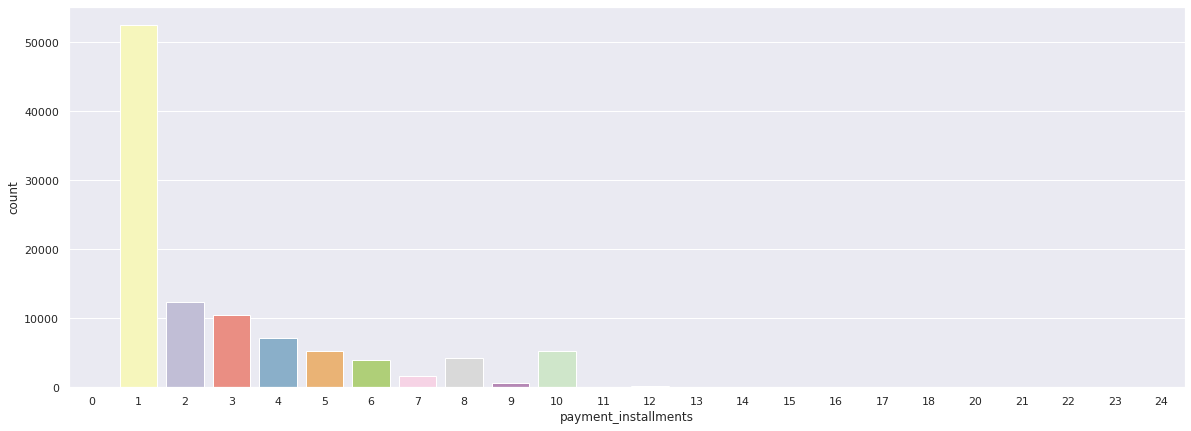

In [ ]:
plt.figure(figsize = (20,7))
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="payment_installments", data=payment, palette="Set3", dodge=False)

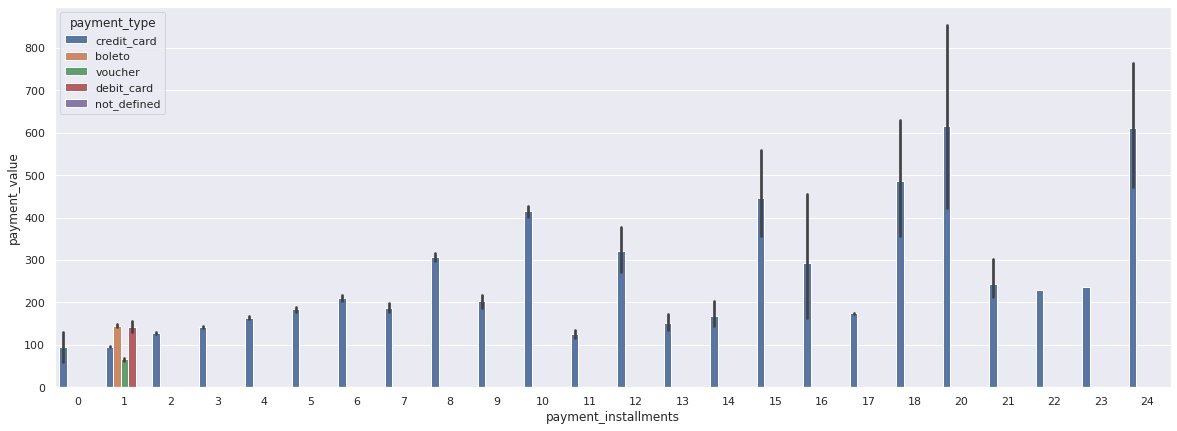

In [ ]:
plt.figure(figsize = (20,7))
ax = sns.barplot(x="payment_installments", y="payment_value", hue="payment_type", data=payment)

#Q5)Descriptive  analysis: What sells most on this e-commerce site?

In [ ]:
#sales by most sales money 
top_sales = pd.DataFrame(q5.groupby('product_category_name').sum()['price'])

top_sales.sort_values(by=['price'], inplace=True, ascending=False)

top_sales = top_sales.head(10)

top_sales

,price
product_category_name,
beleza_saude,1258681.34
relogios_presentes,1205005.68
cama_mesa_banho,1036988.68
esporte_lazer,988048.97
informatica_acessorios,911954.32
moveis_decoracao,729762.49
cool_stuff,635290.85
utilidades_domesticas,632248.66
automotivo,592720.11


In [ ]:
q5

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,month,day,product_id_w,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,9,19,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,5,3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,18,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,8,15,7634da152a4610f1595efa32f14722fc,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2,13,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,5,2,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,7,20,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,10,30,72a30483855e2eafc67aee5dc2560482,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,8,21,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [ ]:
top_sales_by_count = pd.DataFrame(q5.groupby('product_category_name').count()['order_id'])

top_sales_by_count.sort_values(by=['order_id'], inplace=True, ascending=False)

top_sales_by_count = top_sales_by_count.head(10)

top_sales_by_count

,order_id
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
utilidades_domesticas,6964
relogios_presentes,5991
telefonia,4545
ferramentas_jardim,4347


# Q6)Predictive analysis :  What can be the future sales growth rate?

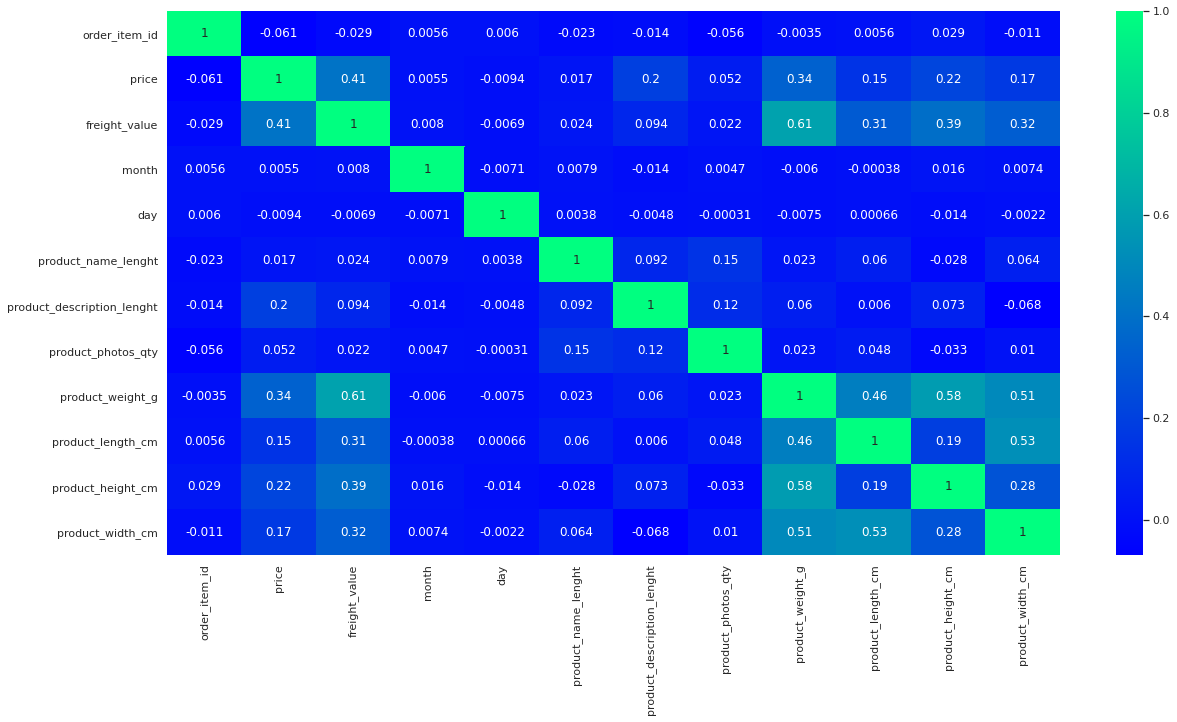

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(q1.corr(), annot = True, cmap='winter')

In [ ]:
q1['year'] = pd.DatetimeIndex(q1['shipping_limit_date']).year
q1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,month,day,product_id_w,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,9,19,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,2017
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,5,3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,2017
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,18,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,2018
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,8,15,7634da152a4610f1595efa32f14722fc,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,2018
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2,13,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,5,2,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,2018
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,7,20,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,2018
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,10,30,72a30483855e2eafc67aee5dc2560482,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,2017
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,8,21,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,2017


In [ ]:
q1['month_year'] = q1['month'].astype('str') + '-' + q1['year'].astype('str')
q1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,month,day,product_id_w,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,year,month_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,9,19,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,2017,9-2017
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,5,3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,2017,5-2017
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,18,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,2018,1-2018
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,8,15,7634da152a4610f1595efa32f14722fc,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,2018,8-2018
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2,13,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,2017,2-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,5,2,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,2018,5-2018
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,7,20,32e07fd915822b0765e448c4dd74c828,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,2018,7-2018
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,10,30,72a30483855e2eafc67aee5dc2560482,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,2017,10-2017
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,8,21,9c422a519119dcad7575db5af1ba540e,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,2017,8-2017


In [ ]:
prod_sales = pd.DataFrame(q1.groupby('month_year').sum()['price'].reset_index(name="price"))

prod_sales

,month_year,price
0,1-2017,80124.74
1,1-2018,845279.18
2,10-2016,49580.55
3,10-2017,658020.23
4,11-2017,883351.63
5,12-2016,10.90
6,12-2017,898920.98
7,2-2017,245982.01
8,2-2018,819228.85
9,2-2020,145.98


In [ ]:
prod_sales[['month', 'year']] = prod_sales['month_year'].str.split('-', 1, expand=True)
prod_sales.describe()

,price
count,2.600000e+01
mean,5.227555e+05
std,3.843666e+05
min,1.090000e+01
25%,1.215891e+05
50%,5.328744e+05
75%,8.643724e+05
max,1.084359e+06


In [ ]:
df=prod_sales
df['dateInt']=df['year'].astype(str) + df['month'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m')

In [ ]:
df['ds']=df['Date']
df['y']=df['price']
df

,month_year,price,month,year,dateInt,Date,ds,y
0,1-2017,80124.74,1,2017,201701,2017-01-01,2017-01-01,80124.74
1,1-2018,845279.18,1,2018,201801,2018-01-01,2018-01-01,845279.18
2,10-2016,49580.55,10,2016,201610,2016-10-01,2016-10-01,49580.55
3,10-2017,658020.23,10,2017,201710,2017-10-01,2017-10-01,658020.23
4,11-2017,883351.63,11,2017,201711,2017-11-01,2017-11-01,883351.63
5,12-2016,10.90,12,2016,201612,2016-12-01,2016-12-01,10.90
6,12-2017,898920.98,12,2017,201712,2017-12-01,2017-12-01,898920.98
7,2-2017,245982.01,2,2017,201702,2017-02-01,2017-02-01,245982.01
8,2-2018,819228.85,2,2018,201802,2018-02-01,2018-02-01,819228.85
9,2-2020,145.98,2,2020,202002,2020-02-01,2020-02-01,145.98


In [ ]:
#implementation of algorithoms is taken from sklearn documentation
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm

X = prod_sales[['month','year']].astype(int)
Y = prod_sales['price'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
X_test
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred
m=mean_squared_error(y_test, y_pred)

accuracy=regr.score(X_test,y_test)
accuracy
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

R2 score = -0.76


as we can , we can not use LinearRegression on this purpose because veriables are not linearly related ,

but we can use Prophet algotithom , a facebook developed algorithom to predict or forecast future observation . in our case is future sales 

In [ ]:
#https://analyticsweek.com/content/time-series-forecasting-with-prophet-in-python/

# df.columns = ['ds', 'y']
P=df[['ds','y']]
from fbprophet import Prophet
model = Prophet()
model.fit(P)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


In [ ]:
future = list()
for i in range(1, 13):
	date = '2021-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [ ]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,1.468166e+06,1.332206e+06,1.840685e+06,1.468165e+06,1.468166e+06,126171.255774,126171.255774,126171.255774,126171.255774,126171.255774,126171.255774,0.0,0.0,0.0,1.594337e+06
1,2021-02-01,1.497304e+06,1.728740e+06,2.210509e+06,1.497304e+06,1.497305e+06,460682.929298,460682.929298,460682.929298,460682.929298,460682.929298,460682.929298,0.0,0.0,0.0,1.957987e+06
2,2021-03-01,1.523623e+06,1.711025e+06,2.233131e+06,1.523622e+06,1.523624e+06,445576.950493,445576.950493,445576.950493,445576.950493,445576.950493,445576.950493,0.0,0.0,0.0,1.969200e+06
3,2021-04-01,1.552762e+06,1.094246e+06,1.613212e+06,1.552761e+06,1.552763e+06,-216131.901895,-216131.901895,-216131.901895,-216131.901895,-216131.901895,-216131.901895,0.0,0.0,0.0,1.336630e+06
4,2021-05-01,1.580961e+06,1.802798e+06,2.309558e+06,1.580960e+06,1.580962e+06,476591.383614,476591.383614,476591.383614,476591.383614,476591.383614,476591.383614,0.0,0.0,0.0,2.057552e+06
5,2021-06-01,1.610099e+06,1.699607e+06,2.206383e+06,1.610098e+06,1.610100e+06,337893.080246,337893.080246,337893.080246,337893.080246,337893.080246,337893.080246,0.0,0.0,0.0,1.947992e+06
6,2021-07-01,1.638298e+06,1.627309e+06,2.121959e+06,1.638297e+06,1.638299e+06,241585.373188,241585.373188,241585.373188,241585.373188,241585.373188,241585.373188,0.0,0.0,0.0,1.879884e+06
7,2021-08-01,1.667437e+06,1.667811e+06,2.194851e+06,1.667436e+06,1.667438e+06,265144.818562,265144.818562,265144.818562,265144.818562,265144.818562,265144.818562,0.0,0.0,0.0,1.932582e+06
8,2021-09-01,1.696576e+06,1.334842e+06,1.846523e+06,1.696574e+06,1.696577e+06,-113442.119484,-113442.119484,-113442.119484,-113442.119484,-113442.119484,-113442.119484,0.0,0.0,0.0,1.583133e+06
9,2021-10-01,1.724774e+06,1.794815e+06,2.307571e+06,1.724773e+06,1.724776e+06,318798.362531,318798.362531,318798.362531,318798.362531,318798.362531,318798.362531,0.0,0.0,0.0,2.043573e+06


In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast: here yhat , 'yhat_lower', 'yhat_upper' variable holds the predicted value of salaes groth treends  

          ds          yhat    yhat_lower    yhat_upper
0 2021-01-01  1.594337e+06  1.332206e+06  1.840685e+06
1 2021-02-01  1.957987e+06  1.728740e+06  2.210509e+06
2 2021-03-01  1.969200e+06  1.711025e+06  2.233131e+06
3 2021-04-01  1.336630e+06  1.094246e+06  1.613212e+06
4 2021-05-01  2.057552e+06  1.802798e+06  2.309558e+06


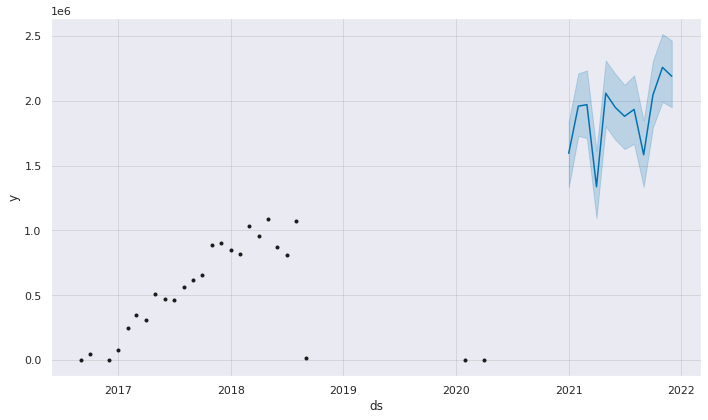

In [ ]:
model.plot(forecast)
from matplotlib import pyplot
pyplot.show()

# Q7) Which products are likely to be bought together?

For this probelm we are using Apriori algorithm. The algorithm is used for identifying frequent item sets and generating association rules based on that.
PyPi package: https://pypi.org/project/apriori-python/

In [ ]:
pip install apriori_python

In [ ]:
from apriori_python import apriori

In [ ]:
df_order_items = pd.read_csv("/content/drive/MyDrive/Sem 6/Big Data/Project/olist_order_items_dataset.csv") 

In [ ]:
df_order_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [ ]:
list_item_groups = df_order_items.groupby('order_id')['product_id'].apply(list).reset_index(name="list")    #group product_id(s) to a list
list_item_groups2 = df_order_items.groupby('order_id').agg({'order_item_id': 'max'}).reset_index()          #group by max item count to remove single item groups
df_apriori = pd.merge(list_item_groups, list_item_groups2, on='order_id')                                   #merge both dataframe on order_id
df_apriori

,order_id,list,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,[4244733e06e7ecb4970a6e2683c13e61],1
1,00018f77f2f0320c557190d7a144bdd3,[e5f2d52b802189ee658865ca93d83a8f],1
2,000229ec398224ef6ca0657da4fc703e,[c777355d18b72b67abbeef9df44fd0fd],1
3,00024acbcdf0a6daa1e931b038114c75,[7634da152a4610f1595efa32f14722fc],1
4,00042b26cf59d7ce69dfabb4e55b4fd9,[ac6c3623068f30de03045865e4e10089],1
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,[4aa6014eceb682077f9dc4bffebc05b0],1
98662,fffcd46ef2263f404302a634eb57f7eb,[32e07fd915822b0765e448c4dd74c828],1
98663,fffce4705a9662cd70adb13d4a31832d,[72a30483855e2eafc67aee5dc2560482],1
98664,fffe18544ffabc95dfada21779c9644f,[9c422a519119dcad7575db5af1ba540e],1


In [ ]:
df_apriori = df_apriori[df_apriori.order_item_id != 1]          #drop rows with 1 item per order otherwise takes too long to run
df_apriori

,order_id,list,order_item_id
13,0008288aa423d2a3f00fcb17cd7d8719,"[368c6c730842d78016ad823897a372db, 368c6c73084...",2
31,00143d0f86d6fbd9f9b38ab440ac16f5,"[e95ee6822b66ac6058e2e4aff656071a, e95ee6822b6...",3
39,001ab0a7578dd66cd4b0a71f5b6e1e41,"[0b0172eb0fd18479d29c3bc122c058c2, 0b0172eb0fd...",3
43,001d8f0e34a38c37f7dba2a37d4eba8b,"[e67307ff0f15ade43fcb6e670be7a74c, e67307ff0f1...",2
69,002c9def9c9b951b1bec6d50753c9891,"[2d9ff06c8870a518f5f6909774e140fb, 2d9ff06c887...",2
...,...,...,...
98603,ffd84ab39cd5e873d8dba24342e65c01,"[fcf50ee5ad1f1a48671052487d2b0bff, fcf50ee5ad1...",2
98626,ffe4b41e99d39f0b837a239110260530,"[e97df839917a6e93404867b1d0319bfc, e97df839917...",2
98637,ffecd5a79a0084f6a592288c67e3c298,"[50fd2b788dc166edd20512370dac54df, 50fd2b788dc...",3
98654,fff8287bbae429a99bb7e8c21d151c41,"[bee2e070c39f3dd2f6883a17a5f0da45, bee2e070c39...",2


In [ ]:
set_apriori = df_apriori['list'].to_list()                  #generate nested list for from the product_id lists to pass to algorithm
set_apriori[:10]

[['368c6c730842d78016ad823897a372db', '368c6c730842d78016ad823897a372db'],
 ['e95ee6822b66ac6058e2e4aff656071a',
  'e95ee6822b66ac6058e2e4aff656071a',
  'e95ee6822b66ac6058e2e4aff656071a'],
 ['0b0172eb0fd18479d29c3bc122c058c2',
  '0b0172eb0fd18479d29c3bc122c058c2',
  '0b0172eb0fd18479d29c3bc122c058c2'],
 ['e67307ff0f15ade43fcb6e670be7a74c', 'e67307ff0f15ade43fcb6e670be7a74c'],
 ['2d9ff06c8870a518f5f6909774e140fb', '2d9ff06c8870a518f5f6909774e140fb'],
 ['d41dc2f2979f52d75d78714b378d4068', '880be32f4db1d9f6e2bec38fb6ac23ab'],
 ['2b939dc9b176d7fa21594d588815d4a4', '2b939dc9b176d7fa21594d588815d4a4'],
 ['1f9799a175f50c9fa725984775cac5c5', '13944d17b257432717fd260e69853140'],
 ['99e71b776debf2f01a69dce207e3e4f8', '99e71b776debf2f01a69dce207e3e4f8'],
 ['656e0eca68dcecf6a31b8ececfabe3e8', '656e0eca68dcecf6a31b8ececfabe3e8']]

In [ ]:
freqItemSet, rules = apriori(set_apriori, minSup=0.0005, minConf=0.1)         #set support and confidence values to generate rules
print(rules)  

[[{'53759a2ecddad2bb87a079a1f1519f73'}, {'389d119b48cf3043d311335e499d9c6b'}, 0.10227272727272728], [{'389d119b48cf3043d311335e499d9c6b'}, {'53759a2ecddad2bb87a079a1f1519f73'}, 0.10465116279069768], [{'422879e10f46682990de24d770e7f83d'}, {'389d119b48cf3043d311335e499d9c6b'}, 0.10679611650485436], [{'389d119b48cf3043d311335e499d9c6b'}, {'422879e10f46682990de24d770e7f83d'}, 0.12790697674418605], [{'0bcc3eeca39e1064258aa1e932269894'}, {'422879e10f46682990de24d770e7f83d'}, 0.2222222222222222], [{'36f60d45225e60c7da4558b070ce4b60'}, {'3f14d740544f37ece8a9e7bc8349797e'}, 0.23529411764705882], [{'0aabfb375647d9738ad0f7b4ea3653b1'}, {'6c3effec7c8ddba466d4f03f982c7aa3'}, 0.35714285714285715], [{'dbb67791e405873b259e4656bf971246'}, {'18486698933fbb64af6c0a255f7dd64c'}, 0.3888888888888889], [{'99a4788cb24856965c36a24e339b6058'}, {'35afc973633aaeb6b877ff57b2793310'}, 0.4142857142857143], [{'0d85c435fd60b277ffb9e9b0f88f927a'}, {'ee57070aa3b24a06fdd0e02efd2d757d'}, 0.46153846153846156], [{'9ad75bd72

In [ ]:
#rename columns and clean the data
df_rules = pd.DataFrame(rules)
df_rules = df_rules.rename(columns={0: 'Item 1', 1: 'Item 2', 2: 'confidence'})
df_rules['Item 1'] = df_rules['Item 1'].astype(str)
df_rules['Item 2'] = df_rules['Item 2'].astype(str)
df_rules['Item 1'] = df_rules['Item 1'].str.replace(r"[\"\',\{\}]", '')
df_rules['Item 2'] = df_rules['Item 2'].str.replace(r"[\"\',\{\}]", '')
df_rules.sort_values('confidence', ascending=False)

,Item 1,Item 2,confidence
35,5b8a5a9417210b1b84b67b9a7aefb935,e5ae72c62ebfa708624f5029d609b160,1.000000
34,f4f67ccaece962d013a4e1d7dc3a61f7,4fcb3d9a5f4871e8362dfedbdb02b064,0.944444
33,4fcb3d9a5f4871e8362dfedbdb02b064,f4f67ccaece962d013a4e1d7dc3a61f7,0.894737
32,18486698933fbb64af6c0a255f7dd64c,dbb67791e405873b259e4656bf971246,0.875000
29,5d790355cbeded0cd60e25cbc4c527a2,5fc3e6a4b52b0c414458104ed4037f1c,0.857143
31,060cb19345d90064d1015407193c233d,98d61056e0568ba048e5d78038790e77,0.857143
30,5fc3e6a4b52b0c414458104ed4037f1c,5d790355cbeded0cd60e25cbc4c527a2,0.857143
28,e6b314a2236c162ede1a879f1075430f,ad4b5def91ac7c575dbdf65b5be311f4,0.750000
27,3ce943997ff85cad84ec6770b35d6bcd,b7d94dc0640c7025dc8e3b46b52d8239,0.714286
26,35afc973633aaeb6b877ff57b2793310,99a4788cb24856965c36a24e339b6058,0.707317


# Q8) How do the customer review affect sales?

In [ ]:
order_review = pd.read_csv("/content/drive/MyDrive/Sem 6/Big Data/Project/olist_order_reviews_dataset.csv")
order_items = pd.read_csv("/content/drive/MyDrive/Sem 6/Big Data/Project/olist_order_items_dataset.csv")

In [ ]:
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

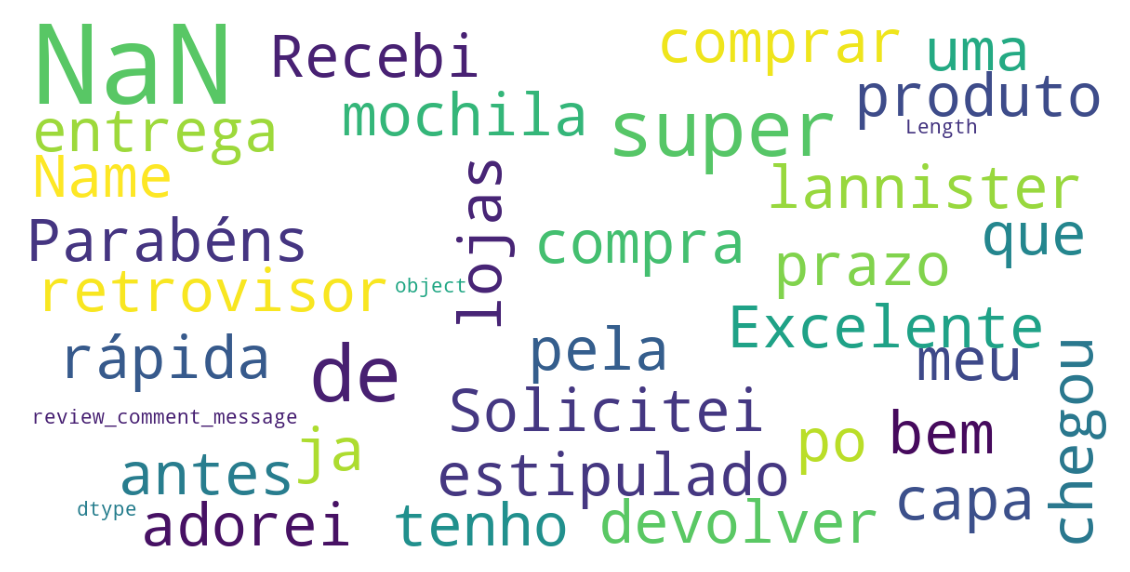

In [ ]:
show_wordcloud(order_review['review_comment_message'])

Above wordcloud is not usable for analysis as it contains irrelavant elements such as the column name, types etc. So we will now clean the messy data for cleaner visualization.

In [ ]:
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
pip install google-trans-new

In [ ]:
import google_trans_new
from google_trans_new import google_translator
translator = google_translator()
translate_text = translator.translate('estipulado, adorei',lang_tgt='en',lang_src='pt' )
print(translate_text)

stipulated, I loved it 


In [ ]:
order_review.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

The review dataset has a huge amount of NaN values and most of them are in the 'review_comment_title' column. So we will drop those missing values for much better visualization.

In [ ]:
review_comment_title = order_review['review_comment_title']
review_df = order_review.drop(['review_comment_title'],axis=1)

#dropping NaN
review_df = review_df.dropna()
review_comment_title = review_comment_title.dropna()

review_df = review_df.reset_index(drop=True)
review_df

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
...,...,...,...,...,...,...
41748,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23
41749,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06
41750,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
41751,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [ ]:
review_comment_title

9                        recomendo
15                 Super recomendo
19         Não chegou meu produto 
22                           Ótimo
34                      Muito bom.
                   ...            
99967                            👍
99971           muito bom produto 
99972    Não foi entregue o pedido
99974              OTIMA EMBALAGEM
99975               Foto enganosa 
Name: review_comment_title, Length: 11715, dtype: object

We will remove the stopwords (ex- I,me,my,the,there etc) from the reviews, using regular expressions

In [ ]:
nltk.download('stopwords')
comments = []
stop_words = set(stopwords.words('portuguese'))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houveríamos',
 'houvesse',


In [ ]:
nltk.download('punkt')
for words in review_df['review_comment_message']:
  only_letters = re.sub('[^a-zA-Z]',' ',words)
  tokens = nltk.word_tokenize(only_letters)
  lower_case = [l.lower() for l in tokens]
  filtered_texts = list(filter(lambda l:l not in stop_words,lower_case))
  comments.append(' '.join(filtered_texts))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
comments #clean comments

['recebi bem antes prazo estipulado',
 'parab ns lojas lannister adorei comprar internet seguro pr tico parab ns todos feliz p scoa',
 'aparelho eficiente site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega antes prazo',
 'gostaria saber sempre recebi compra agora decpcionou',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilmente entrega efetuada antes prazo dado produto j come ser usado at presente problemas',
 'rel gio bonito barato',
 'n gostei comprei gato lebre',
 'sempre compro internet entrega ocorre antes prazo combinado acredito ser prazo m ximo stark prazo m ximo j esgotou ainda n recebi produto',
 'recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completamente apaixonada loja super respons vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedo

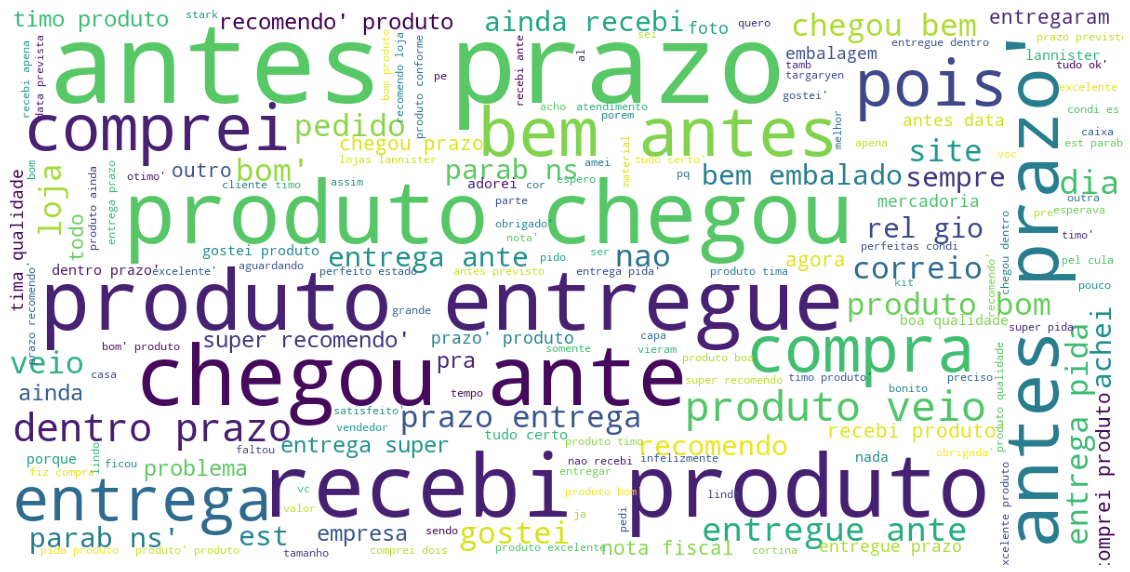

In [ ]:
show_wordcloud(comments)

This wordcloud is much more sophisticated than the one before. But it doesnot mean much if we do not understand Portuguese. So we will now translate the comments to English for better understanding.

First we need to get tri-grams for simpler translation.

In [ ]:
coeff = CountVectorizer(ngram_range=(3,3))
counts = coeff.fit_transform(comments)
trigrams = pd.DataFrame(counts.sum(axis=0),columns=coeff.get_feature_names()).T.sort_values(0,ascending=False).head(500) #all the trigrams cuases to terminate the API load, so we will only take first 500
trigrams = trigrams.reset_index()
trigrams.rename(columns={'index':'Trigrams',0:'frequency'},inplace=True)
trigrams['english_translation'] = trigrams['Trigrams'].apply(translator.translate)

In [ ]:
trigrams

,Trigrams,frequency,english_translation
0,chegou antes prazo,1112,arrived before deadline
1,bem antes prazo,708,well before term
2,entregue antes prazo,608,delivered before deadline
3,produto chegou antes,448,product arrived before
4,entrega antes prazo,433,delivery before deadline
...,...,...,...
495,ns lojas lannister,15,ns lannister stores
496,entrei contato loja,15,I contacted the store
497,comprei produtos recebi,15,I bought products I received
498,prazo produto timo,15,optimal product term


In [ ]:
trigrams.head(50)

,Trigrams,frequency,english_translation
0,chegou antes prazo,1112,arrived before deadline
1,bem antes prazo,708,well before term
2,entregue antes prazo,608,delivered before deadline
3,produto chegou antes,448,product arrived before
4,entrega antes prazo,433,delivery before deadline
5,chegou bem antes,417,arrived well before
6,produto entregue antes,374,product delivered before
7,entrega super pida,297,super delivery ask
8,antes prazo previsto,287,before expected deadline
9,ainda recebi produto,261,I still received product


Looking through the dataframe, we were able to understand better about the unhappy comments of displeased customers. These comments include : 'I did not recieve the product', 'I want money back', 'so far nothing'. They are mostly complaints about getting incomplete delivery or receiving defective/wrong products. By far, these were the major complaints of unhappy customers but we have also saw a huge amount of satisfactory comments among other reviews.

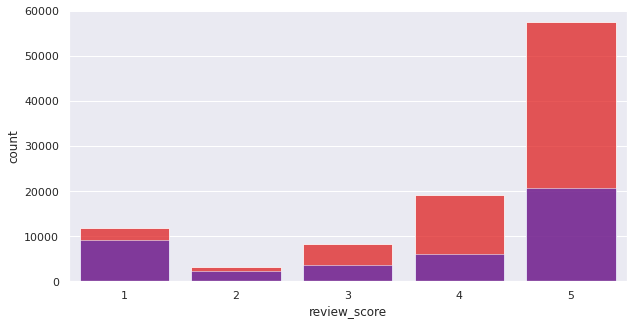

In [ ]:
plt.figure(figsize=(10,5));
sns.countplot(x='review_score', data=order_review, color='red', alpha=0.75)
sns.countplot(x='review_score', data=review_df, color='blue', alpha=0.5)

In above countplot, we can notice that about 40% of the 5 star reviewers gave reviews on their purchase while 60% didn't. Again for 1-star reviewers almost 80% of them gave reviews. So we can conclude that customer tend to give reviews when they are displeased with the purchase.